In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
rain = pd.read_csv('./data/rain_data_aus.csv')

In [3]:
from opencage.geocoder import OpenCageGeocode

key = '46b48d2d3d8f4acb88f582e3a83cbe77'
geocoder = OpenCageGeocode(key)

city_lat = {}
city_lng = {}

for city in rain['location'].unique():
    query = f'{city}, Australia'
    results = geocoder.geocode(query)
    city_lat[city] =results[0]['geometry']['lat']
    city_lng[city] =results[0]['geometry']['lng']

In [4]:
cities = pd.DataFrame(data=[city_lat,city_lng]).T

In [5]:
cities = cities.reset_index()
cities.columns= ['location','lat','lng']

In [6]:
rain = pd.merge(left=rain,right=cities,on='location')

In [7]:
rain.columns

Index(['date', 'location', 'mintemp', 'maxtemp', 'rainfall', 'evaporation',
       'sunshine', 'humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm',
       'cloud9am', 'cloud3pm', 'temp9am', 'temp3pm', 'raintoday',
       'amountOfRain', 'raintomorrow', 'temp', 'humidity', 'precipitation3pm',
       'precipitation9am', 'modelo_vigente', 'lat', 'lng'],
      dtype='object')

In [8]:
df=rain[['raintomorrow','lat', 'lng','location']]

In [9]:
df['raintomorrow']=df['raintomorrow'].apply(lambda x: 1 if x=='Yes' else 0)

C:\Users\pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# Primeira tentativa com lat,lng e média de raintomorrow

In [10]:
df.columns

Index(['raintomorrow', 'lat', 'lng', 'location'], dtype='object')

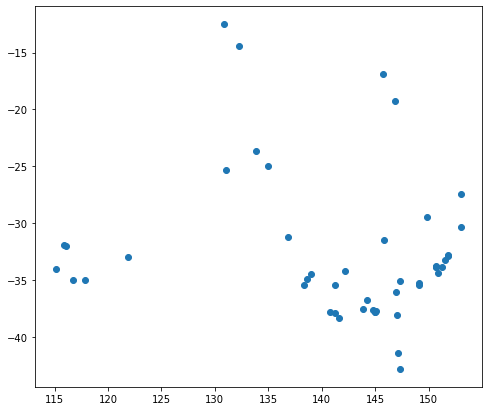

In [11]:
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(df.lng.unique(), df.lat.unique())

In [12]:
from sklearn.preprocessing import StandardScaler
X =df.groupby('location')['lat','lng','raintomorrow'].mean()
X_std = StandardScaler().fit_transform(X)

C:\Users\pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


C:\Users\pedro\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


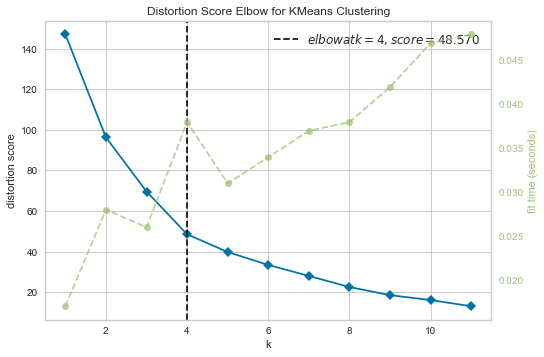

In [13]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(X_std)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [14]:
kmeans = KMeans(3)
kmeans.fit(X_std)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [15]:
X['labels']=kmeans.labels_

In [16]:
X

,lat,lng,raintomorrow,labels
location,,,,
Adelaide,-34.928181,138.599931,0.222654,0
Albany,-35.024782,117.883608,0.299072,2
Albury,-36.080477,146.916280,0.205247,0
AliceSprings,-23.696819,133.878704,0.080501,1
BadgerysCreek,-33.877277,150.686196,0.199112,0
Ballarat,-37.562263,143.860722,0.257926,0
Bendigo,-36.758877,144.282593,0.185234,0
Brisbane,-27.468968,153.023499,0.224296,0
Cairns,-16.920666,145.772185,0.317938,2


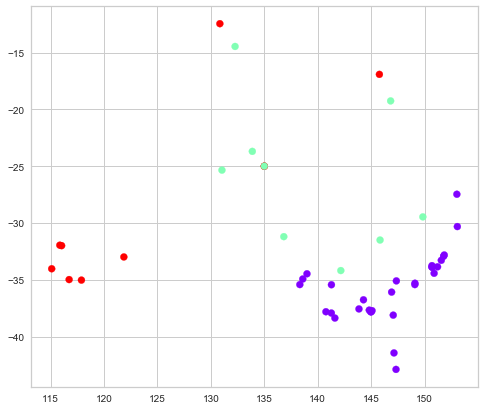

In [17]:
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(X.lng, X.lat,c=X.labels, cmap='rainbow')

# Segunda tentativa com PCA nas coordenadas geograficas e media de rain

In [18]:
from sklearn.decomposition import PCA

In [19]:
X=df.groupby('location')['location','lat','lng','raintomorrow'].mean().reset_index()
coord = X[['lat','lng']]
pca = PCA(1)
pca.fit(coord)
X_coord=pca.transform(coord)
X['coord']= X_coord
X_std = StandardScaler().fit_transform(X[['coord','raintomorrow']])

C:\Users\pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


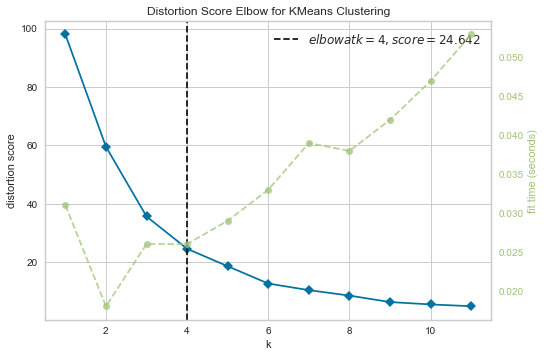

In [20]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(X_std)        # Fit the data to the visualizer
visualizer.show()     

In [21]:
kmeans = KMeans(3)
kmeans.fit(X_std)
kmeans.labels_

array([0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 2, 0, 0, 0, 2, 2,
       0, 1, 0, 2, 0, 1, 2, 2, 0, 1, 1, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 1,
       0, 0, 1, 0, 2])

In [22]:
X['labels']=kmeans.labels_

In [23]:
X

,location,lat,lng,raintomorrow,coord,labels
0,Adelaide,-34.928181,138.599931,0.222654,1.770283,0
1,Albany,-35.024782,117.883608,0.299072,22.146900,1
2,Albury,-36.080477,146.916280,0.205247,-6.619111,0
3,AliceSprings,-23.696819,133.878704,0.080501,8.392691,2
4,BadgerysCreek,-33.877277,150.686196,0.199112,-9.942927,0
5,Ballarat,-37.562263,143.860722,0.257926,-3.871685,0
6,Bendigo,-36.758877,144.282593,0.185234,-4.145731,0
7,Brisbane,-27.468968,153.023499,0.224296,-11.117093,0
8,Cairns,-16.920666,145.772185,0.317938,-2.124110,0
9,Canberra,-35.297591,149.101268,0.184026,-8.632412,0


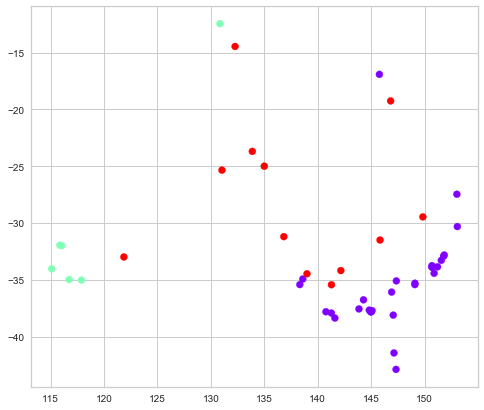

In [24]:
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(X.lng, X.lat,c=X.labels, cmap='rainbow')

# Agglomerative Clusters

In [151]:
rain.columns

Index(['date', 'location', 'mintemp', 'maxtemp', 'rainfall', 'evaporation',
       'sunshine', 'humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm',
       'cloud9am', 'cloud3pm', 'temp9am', 'temp3pm', 'raintoday',
       'amountOfRain', 'raintomorrow', 'temp', 'humidity', 'precipitation3pm',
       'precipitation9am', 'modelo_vigente', 'lat', 'lng'],
      dtype='object')

In [189]:
df=rain[['date', 'location','lat','raintomorrow','lng']]

In [190]:
df.drop_duplicates(inplace=True)

C:\Users\pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [191]:
df.dropna(inplace=True)

C:\Users\pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [192]:
df['week']= pd.to_datetime(df['date']).dt.week

C:\Users\pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [193]:
df.drop(columns=['date'],inplace=True)

C:\Users\pedro\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [194]:
df['raintomorrow']=df['raintomorrow'].apply(lambda x: 1 if x=='Yes' else 0)

C:\Users\pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [195]:
X=pd.crosstab(index=df['location'],columns=df['week'],values=df['raintomorrow'],aggfunc='mean')

In [196]:
from sklearn.cluster import AgglomerativeClustering
hierarchical = AgglomerativeClustering(n_clusters=3, affinity='correlation', linkage='complete')
hierarchical.fit(X)

AgglomerativeClustering(affinity='correlation', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=3)

In [197]:
X['labels']=hierarchical.labels_
X

week,1,2,3,4,5,6,7,8,9,10,...,45,46,47,48,49,50,51,52,53,labels
location,,,,,,,,,,,,,,,,,,,,,
Adelaide,0.083333,0.190476,0.095238,0.066667,0.133333,0.054545,0.090909,0.035714,0.067797,0.155172,...,0.193548,0.015873,0.213115,0.166667,0.192308,0.296296,0.072727,0.129630,0.000000,1
Albany,0.114754,0.063492,0.161290,0.174603,0.100000,0.185185,0.107143,0.107143,0.135593,0.063492,...,0.285714,0.089286,0.178571,0.301887,0.214286,0.125000,0.092593,0.113208,0.071429,1
Albury,0.112903,0.222222,0.063492,0.158730,0.166667,0.129630,0.166667,0.127273,0.172414,0.081967,...,0.232143,0.071429,0.196429,0.185185,0.160714,0.196429,0.181818,0.160714,0.285714,1
AliceSprings,0.177419,0.193548,0.142857,0.063492,0.133333,0.089286,0.071429,0.160714,0.169492,0.111111,...,0.089286,0.089286,0.071429,0.129630,0.285714,0.125000,0.145455,0.207547,0.142857,0
BadgerysCreek,0.178571,0.225806,0.161290,0.360656,0.305085,0.166667,0.381818,0.166667,0.406780,0.114754,...,0.272727,0.245283,0.222222,0.265306,0.333333,0.162791,0.145833,0.183673,0.142857,2
Ballarat,0.114754,0.225806,0.174603,0.112903,0.101695,0.129630,0.072727,0.090909,0.186441,0.190476,...,0.214286,0.125000,0.285714,0.277778,0.250000,0.250000,0.125000,0.107143,0.142857,1
Bendigo,0.081967,0.158730,0.047619,0.111111,0.133333,0.089286,0.125000,0.072727,0.169492,0.095238,...,0.214286,0.107143,0.214286,0.240741,0.178571,0.214286,0.107143,0.071429,0.142857,1
Brisbane,0.262295,0.206349,0.161290,0.507937,0.351852,0.222222,0.345455,0.392857,0.389831,0.349206,...,0.222222,0.238095,0.258065,0.333333,0.410714,0.232143,0.285714,0.303571,0.357143,2
Cairns,0.419355,0.460317,0.603175,0.587302,0.550000,0.517857,0.446429,0.589286,0.457627,0.539683,...,0.196429,0.351852,0.400000,0.384615,0.173077,0.396226,0.423077,0.509434,0.714286,2


In [198]:
X = pd.merge(left=X,right=cities,on='location')

In [199]:
X

,location,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,labels,lat,lng
0,Adelaide,0.083333,0.190476,0.095238,0.066667,0.133333,0.054545,0.090909,0.035714,0.067797,...,0.213115,0.166667,0.192308,0.296296,0.072727,0.129630,0.000000,1,-34.928181,138.599931
1,Albany,0.114754,0.063492,0.161290,0.174603,0.100000,0.185185,0.107143,0.107143,0.135593,...,0.178571,0.301887,0.214286,0.125000,0.092593,0.113208,0.071429,1,-35.024782,117.883608
2,Albury,0.112903,0.222222,0.063492,0.158730,0.166667,0.129630,0.166667,0.127273,0.172414,...,0.196429,0.185185,0.160714,0.196429,0.181818,0.160714,0.285714,1,-36.080477,146.916280
3,AliceSprings,0.177419,0.193548,0.142857,0.063492,0.133333,0.089286,0.071429,0.160714,0.169492,...,0.071429,0.129630,0.285714,0.125000,0.145455,0.207547,0.142857,0,-23.696819,133.878704
4,BadgerysCreek,0.178571,0.225806,0.161290,0.360656,0.305085,0.166667,0.381818,0.166667,0.406780,...,0.222222,0.265306,0.333333,0.162791,0.145833,0.183673,0.142857,2,-33.877277,150.686196
5,Ballarat,0.114754,0.225806,0.174603,0.112903,0.101695,0.129630,0.072727,0.090909,0.186441,...,0.285714,0.277778,0.250000,0.250000,0.125000,0.107143,0.142857,1,-37.562263,143.860722
6,Bendigo,0.081967,0.158730,0.047619,0.111111,0.133333,0.089286,0.125000,0.072727,0.169492,...,0.214286,0.240741,0.178571,0.214286,0.107143,0.071429,0.142857,1,-36.758877,144.282593
7,Brisbane,0.262295,0.206349,0.161290,0.507937,0.351852,0.222222,0.345455,0.392857,0.389831,...,0.258065,0.333333,0.410714,0.232143,0.285714,0.303571,0.357143,2,-27.468968,153.023499
8,Cairns,0.419355,0.460317,0.603175,0.587302,0.550000,0.517857,0.446429,0.589286,0.457627,...,0.400000,0.384615,0.173077,0.396226,0.423077,0.509434,0.714286,2,-16.920666,145.772185
9,Canberra,0.130435,0.185714,0.157143,0.214286,0.268657,0.174603,0.238095,0.096774,0.292308,...,0.200000,0.294118,0.238095,0.238095,0.209677,0.274194,0.071429,0,-35.297591,149.101268


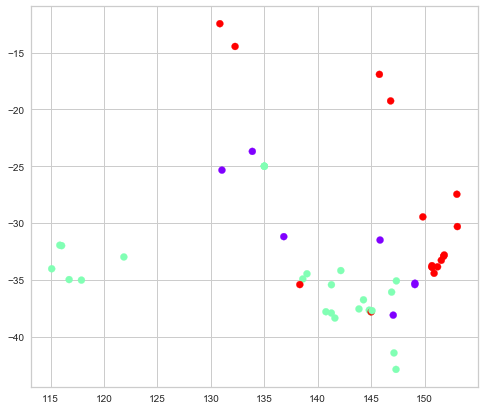

In [200]:
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(X.lng, X.lat,c=X.labels, cmap='rainbow')